<a href="https://colab.research.google.com/github/more-aishwarya/Data-Visualization-python/blob/main/MallDataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

EDA [Exploratory Data Analysis]

In [ ]:
 #Load the dataset
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#check number of columns and rows
df.shape

(200, 5)

In [ ]:
#Statistical details for the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Datatypes, Missing Data, and Summary Statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Check count of null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Preprocessing and feature engineering

In [ ]:
#Changing the name of some columns
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Genre': 'Gender','Spending Score (1-100)': 'Spending Score'})

In [ ]:
# Value counts of the column - Gender
gender_count = df['Gender'].value_counts(dropna = False)
gender_count

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
# Mean of Annual Income by Gender
gender_income = df[['Gender', 'Annual Income']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income
0,Female,59.250000
1,Male,62.227273


Text(17.31944444444445, 0.5, 'Count')

<Figure size 900x400 with 0 Axes>

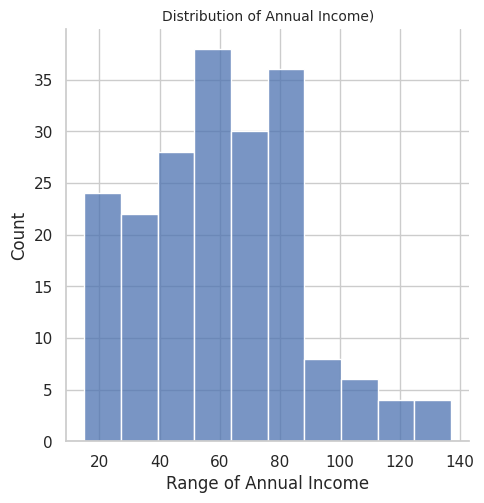

In [ ]:
#Distribution Plot of Annnual Income
plt.figure(figsize=(9, 4))
sns.set(style = 'whitegrid')
sns.displot(df['Annual Income'])
plt.title('Distribution of Annual Income)', fontsize = 10)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

<ipython-input-107-bd540b909c78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

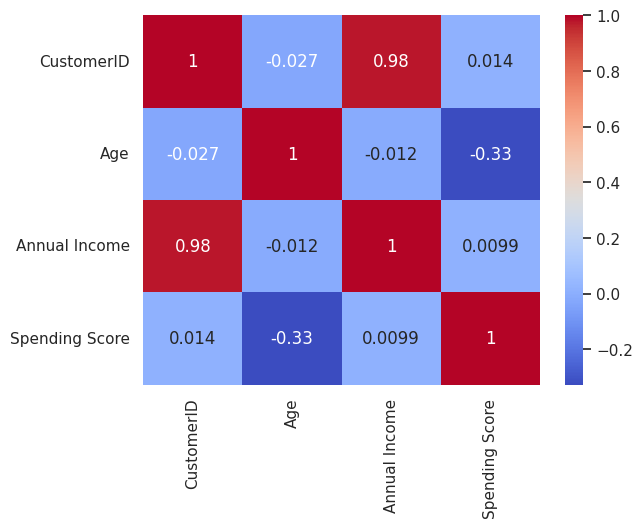

In [ ]:
# Heatmap  correlation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

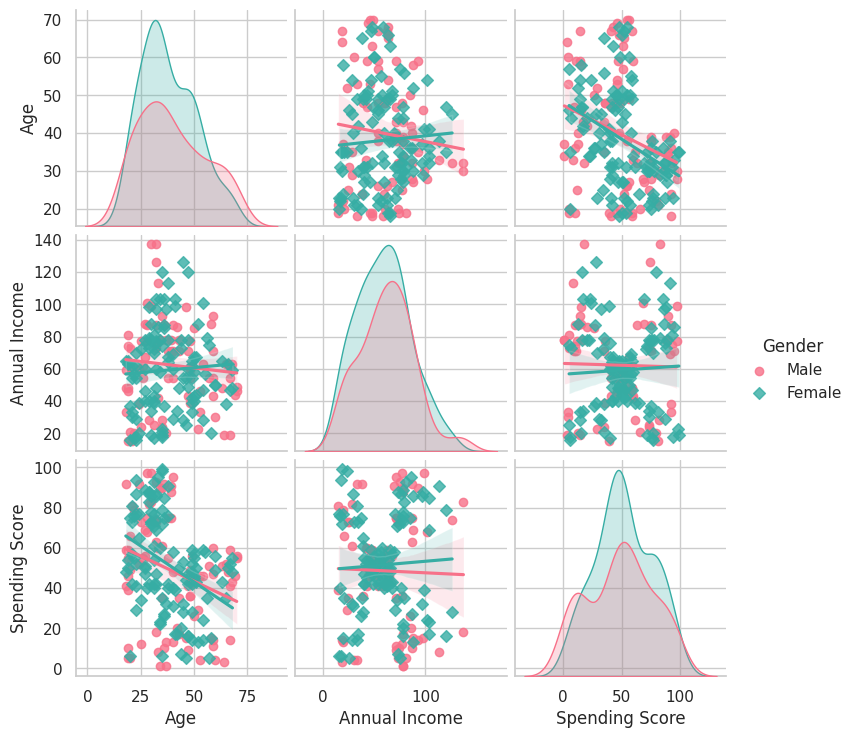

In [ ]:
#Pairplot with variables
sns.pairplot(df, vars=["Age", "Annual Income", "Spending Score"],
kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

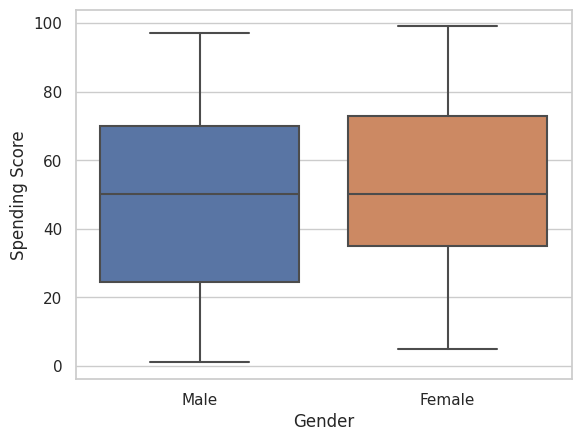

In [ ]:
# Box plot  between Spending score  and Gender
sns.boxplot(data=df, x='Gender', y='Spending Score');

Female    112
Male       88
Name: Gender, dtype: int64

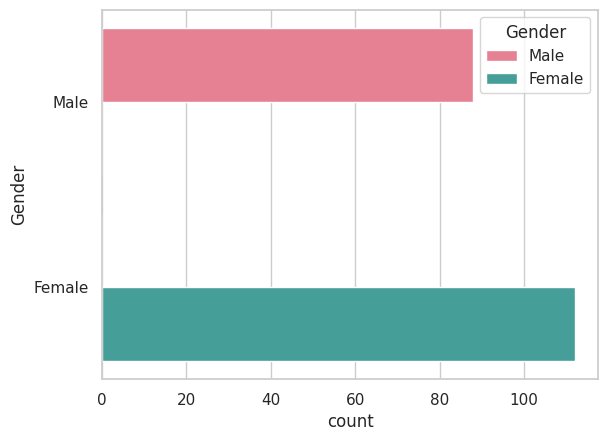

In [ ]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

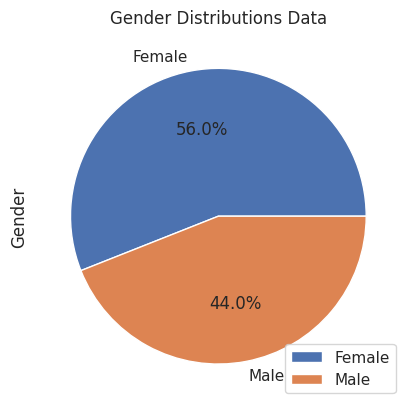

In [ ]:
# Pie chart for Gender distribution
df.Gender.value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title('Gender Distributions Data')
plt.legend()
plt.show()

# Conditions

1. Create any desired plot to visualize the distribution of annual income comparing the spendings score.

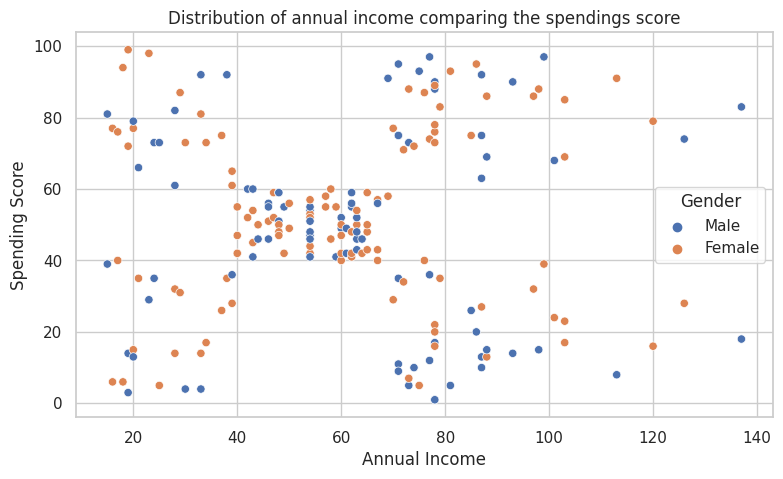

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['Gender'])
plt.title('Distribution of annual income comparing the spendings score')
plt.show()

2. Create a plotting to show the distribution of customers by gender and their spendings.

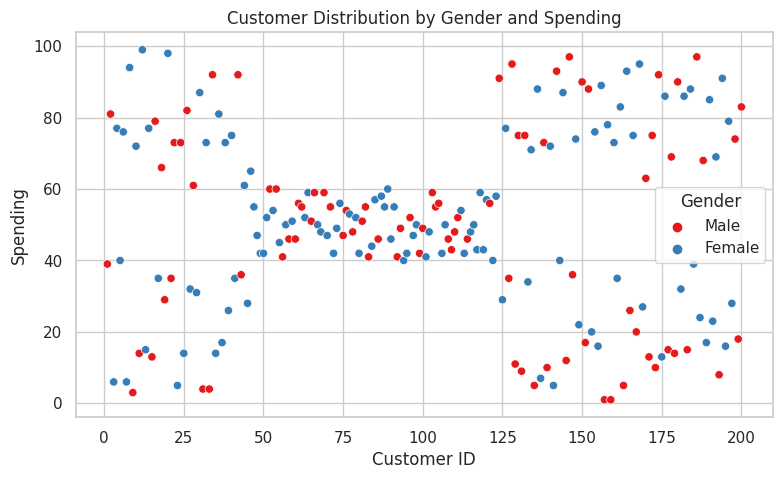

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x='CustomerID', y='Spending Score', hue='Gender', data=df, palette='Set1')
plt.title('Customer Distribution by Gender and Spending')
plt.xlabel('Customer ID')
plt.ylabel('Spending')
plt.show()

3. Select customers whose spending in the mall is above a certain threshold.
Example: Spending score > 70 per month.

In [ ]:
spending_threshold = 70
high_spending_customers = df[df['Spending Score'] > spending_threshold]
print("Customers with spending above", spending_threshold)
print(high_spending_customers)

Customers with spending above 70
     CustomerID  Gender  Age  Annual Income  Spending Score
1             2    Male   21             15              81
3             4  Female   23             16              77
5             6  Female   22             17              76
7             8  Female   23             18              94
9            10  Female   30             19              72
11           12  Female   35             19              99
13           14  Female   24             20              77
15           16    Male   22             20              79
19           20  Female   35             23              98
21           22    Male   25             24              73
23           24    Male   31             25              73
25           26    Male   29             28              82
29           30  Female   23             29              87
31           32  Female   21             30              73
33           34    Male   18             33              92
35     

4. Identify customers within a specific age range for targeted marketing campaigns.
Example: 25 <= Age <= 35.

In [ ]:
min_age = 25
max_age = 35

# Select customers within the specified age range
targeted_customers = df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]

# Display the result
print("Customers within the age range", min_age, "to", max_age)
print(targeted_customers)

Customers within the age range 25 to 35
     CustomerID  Gender  Age  Annual Income  Spending Score
4             5  Female   31             17              40
6             7  Female   35             18               6
9            10  Female   30             19              72
11           12  Female   35             19              99
16           17  Female   35             21              35
..          ...     ...  ...            ...             ...
192         193    Male   33            113               8
195         196  Female   35            120              79
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[63 rows x 5 columns]


5. Create a scatter plot with annual income on the x-axis and age on the y-axis to see if there is a
correlation between income and age.

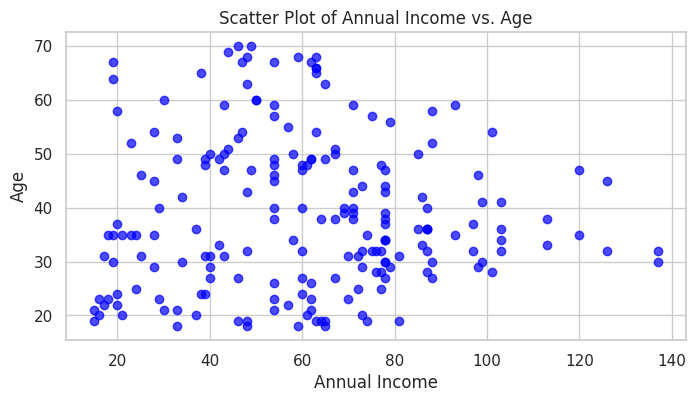

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Annual Income'], df['Age'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Annual Income vs. Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Models:

In [ ]:
X = df[['Age', 'Annual Income']]
y = df['Gender']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize  StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# K Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn}')
# Support Vector Classifier (SVC)
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy (SVC): {accuracy_svc}')
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf}')
# PCA and KNN
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Print the accuracy score
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print(f'Accuracy (PCA + KNN): {accuracy_knn_pca}')

Accuracy (KNN): 0.425
Accuracy (SVC): 0.525
Accuracy (Random Forest): 0.625
Accuracy (PCA + KNN): 0.425


In [ ]:
X = df[['Age', 'Annual Income']]
y = df['Gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report for Random Forest:\n", report)


Accuracy: 0.675
Classification Report for Random Forest:
               precision    recall  f1-score   support

      Female       0.65      0.81      0.72        21
        Male       0.71      0.53      0.61        19

    accuracy                           0.68        40
   macro avg       0.68      0.67      0.66        40
weighted avg       0.68      0.68      0.67        40



In [ ]:
X = df[['Age', 'Annual Income']]
y = df['Gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluate models
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

# Print the results
print("\nK Nearest Neighbors Accuracy:", knn_accuracy)
print("K Nearest Neighbors Classification Report:\n", knn_report)


K Nearest Neighbors Accuracy: 0.475
K Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

      Female       0.50      0.67      0.57        21
        Male       0.42      0.26      0.32        19

    accuracy                           0.48        40
   macro avg       0.46      0.46      0.45        40
weighted avg       0.46      0.47      0.45        40



In [ ]:
X = df[['Age', 'Annual Income']]
y = df['Gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Classifier
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Evaluate models
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_report = classification_report(y_test, svc_pred)

# Print the results
print("\nSupport Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier Classification Report:\n", svc_report)


Support Vector Classifier Accuracy: 0.525
Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

      Female       0.53      1.00      0.69        21
        Male       0.00      0.00      0.00        19

    accuracy                           0.53        40
   macro avg       0.26      0.50      0.34        40
weighted avg       0.28      0.53      0.36        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
